# >---------------- Natual Language Processing (NLP) Project --------------------<

##### Going to use [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).


In [2]:
import numpy as np 
import pandas as pd

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline 

In [5]:
# reading the csv file 

In [6]:
yelp = pd.read_csv('yelp.csv')

In [10]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [13]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [14]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [35]:
# Creating a new column text length for no of words in text column

In [29]:
yelp['text length'] = [len(l) for l in yelp['text']]

In [34]:
len(yelp['text'][0]) #just checking hehe and we did correcly 

889

In [36]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


### EDA

/home/sudeep/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


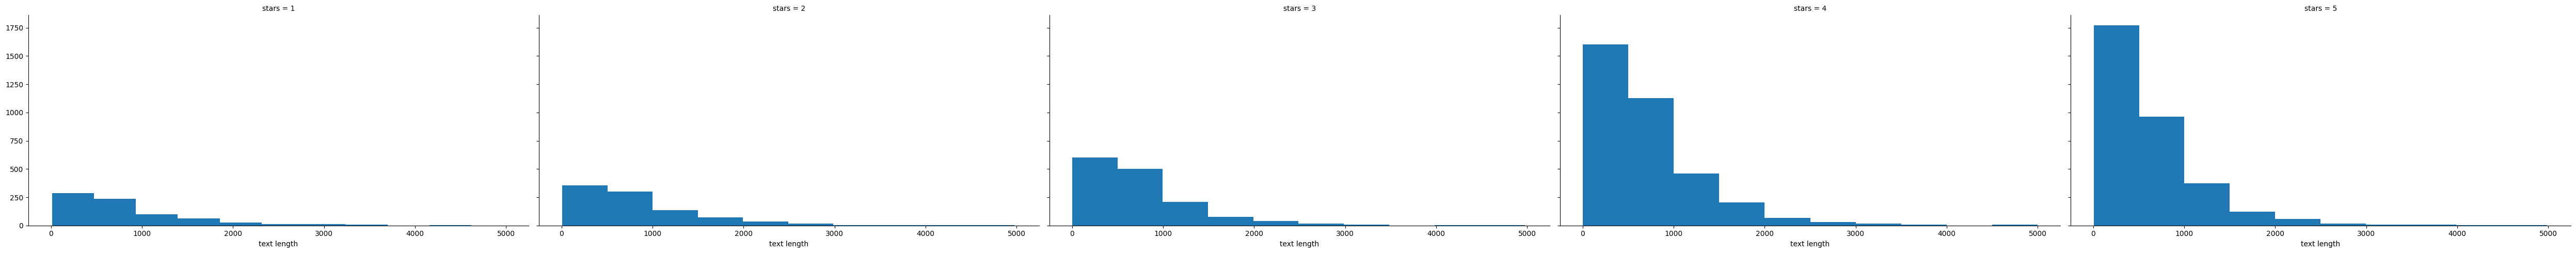

In [51]:

g = sns.FacetGrid(yelp, col = 'stars',aspect=2, height=5 )
g.map(plt.hist, 'text length')
plt.show()

In [52]:
# box plot of text length for each star category 

<Axes: xlabel='stars', ylabel='text length'>

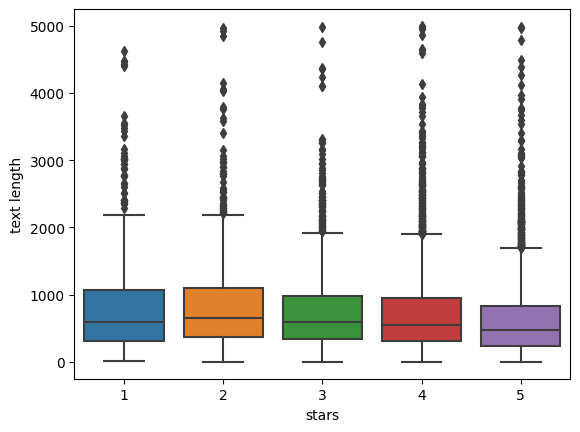

In [53]:
sns.boxplot(x='stars', y ='text length', data= yelp)

In [54]:
yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
...,...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,668
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,881
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,1425
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,880


In [55]:
yelp.groupby('stars')['text length'].mean().sort_values(ascending=False).head()

stars
2    842.256742
1    826.515354
3    758.498289
4    712.923142
5    624.999101
Name: text length, dtype: float64

### * count plot of the number of occurence for each type of star rating 

<Axes: xlabel='stars', ylabel='count'>

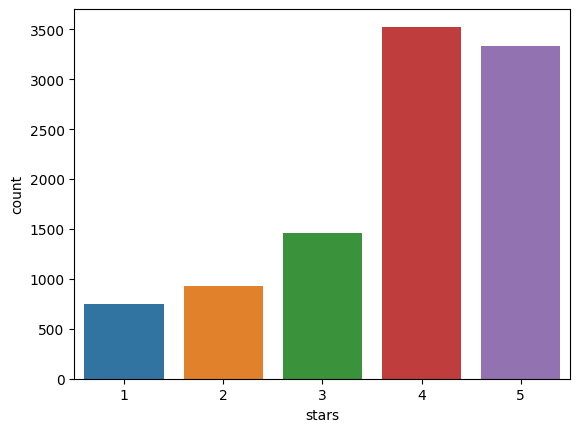

In [66]:
sns.countplot(x='stars', data= yelp)

In [83]:
yelp_df = yelp.groupby('stars')[['cool', 'funny', 'useful','text length']].mean()

In [86]:
# identifying the correlation 

In [85]:
yelp_df.corr()

,cool,funny,useful,text length
cool,1.000000,-0.944939,-0.743329,-0.857664
funny,-0.944939,1.000000,0.894506,0.843461
useful,-0.743329,0.894506,1.000000,0.699881
text length,-0.857664,0.843461,0.699881,1.000000


<Axes: >

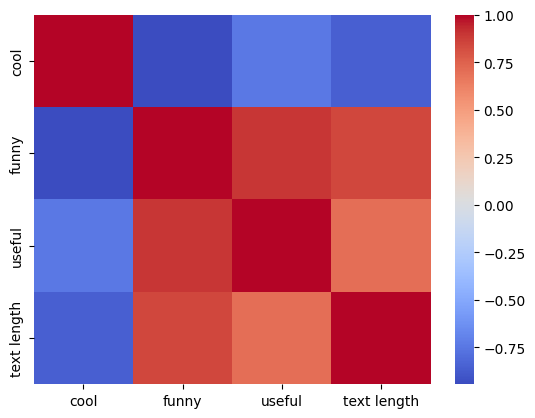

In [94]:
# heatmap showing the correlation of the data

sns.heatmap(yelp_df.corr(), cmap='coolwarm')

# NLP Classification

In [106]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [109]:
X = yelp_class['text']
y = yelp_class['stars']

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

In [111]:
c_vector = CountVectorizer()

In [112]:
X = c_vector.fit_transform(X)

## train_test_split

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test , y_train , y_test = train_test_split(X, y, random_state=101, test_size=0.3)

## Training a model

In [115]:
# time to train the model 

from sklearn.naive_bayes import MultinomialNB

In [116]:
nb = MultinomialNB()

In [117]:
nb.fit(X_train, y_train)

MultinomialNB()

## Prediction and evaluation

In [119]:
predictions = nb.predict(X_test)

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

In [122]:

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [123]:
# addition : 
# using randomforestclassifier 


In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf = RandomForestClassifier()

In [126]:
rf.fit(X_train , y_train)

RandomForestClassifier()

In [127]:
pred = rf.predict(X_test)

In [130]:
print(classification_report(y_test , pred))

print('\n ')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           1       0.95      0.25      0.40       228
           5       0.85      1.00      0.92       998

    accuracy                           0.86      1226
   macro avg       0.90      0.63      0.66      1226
weighted avg       0.87      0.86      0.82      1226


 
[[159  69]
 [ 22 976]]


In [129]:
# The randomForestClassifier was just fun hehe : though it gave nice result

## Using text processing 

In [131]:
from sklearn.feature_extraction.text import TfidfTransformer

In [132]:
from sklearn.pipeline import Pipeline

In [135]:
pipeline = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()) # train on TF-IDF vectors / Naive Bayes Classifier
])

# Using pipeline

This pipeline has all pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text

##### train test split

In [137]:
X = yelp_class['text']
y = yelp_class['stars']

In [138]:
X_train, X_test, y_train , y_test = train_test_split(X,y, random_state=101, test_size=0.3)

In [139]:
# time to fit pipeline 

In [140]:
pipeline.fit(X_train, y_train )

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

#### Prediction and evaluation 

In [141]:
pl_pred = pipeline.predict(X_test)

In [143]:
print(classification_report(y_test, pl_pred))
print('\n\n')
print(confusion_matrix(y_test , pl_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226




[[  0 228]
 [  0 998]]


/home/sudeep/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sudeep/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sudeep/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Looks like Tf-Idf actually made things worse!

In [167]:
## recreating the pipeline 
import string

In [168]:
from nltk.corpus import stopwords

In [169]:
def text_processing(mess):
    nopunc = [word for word in mess if word not in string.punctuation ]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [172]:
## that's it 
# no significance of doin' it 

* that's all for this project 

#### Do follow on :  
[My Github](https://github.com/sudeepbogati7) <br>
[Instagram](https://instagram.com/the_sudeep69)<br>
[sudeepbogati.netlify.app](https://sudeepbogati.netlify.app)